In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparing

In [2]:
house = pd.read_csv("kc_house_data.csv")
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14633 non-null  int64  
 1   date           14633 non-null  object 
 2   price          14633 non-null  int64  
 3   bedrooms       14633 non-null  int64  
 4   bathrooms      14633 non-null  float64
 5   sqft_living    14633 non-null  int64  
 6   sqft_lot       14633 non-null  int64  
 7   floors         14633 non-null  float64
 8   waterfront     14633 non-null  int64  
 9   view           14633 non-null  object 
 10  condition      14633 non-null  int64  
 11  grade          14633 non-null  int64  
 12  sqft_above     14633 non-null  int64  
 13  sqft_basement  14633 non-null  int64  
 14  yr_built       14633 non-null  int64  
 15  yr_renovated   14633 non-null  object 
 16  zipcode        14633 non-null  int64  
 17  lat            14633 non-null  float64
 18  long  

In [3]:
house.shape

(14633, 21)

- The size of dataset is `14633` with `21` columns.

In [4]:
house['age'] = house['date'].apply(lambda x: int(x[:4])) - house['yr_built']

In [5]:
house[house == 0].all()

id                True
date              True
price             True
bedrooms         False
bathrooms        False
sqft_living       True
sqft_lot          True
floors            True
waterfront       False
view              True
condition         True
grade             True
sqft_above        True
sqft_basement    False
yr_built          True
yr_renovated      True
zipcode           True
lat               True
long              True
sqft_living15     True
sqft_lot15        True
age              False
dtype: bool

- The columns contains 0 are: <b>bedrooms, bathrooms, waterfront, sqft_basement, yr_renovated</b>. Since normal house has at lease 1 bedroom and bathroom, `0 badroom/bathroom` is equal to `missing value` in this dataset.

In [6]:
house['bedrooms'] = house['bedrooms'].replace(0, np.nan)
house['bathrooms'] = house['bathrooms'].replace(0, np.nan)

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14633 non-null  int64  
 1   date           14633 non-null  object 
 2   price          14633 non-null  int64  
 3   bedrooms       14624 non-null  float64
 4   bathrooms      13776 non-null  float64
 5   sqft_living    14633 non-null  int64  
 6   sqft_lot       14633 non-null  int64  
 7   floors         14633 non-null  float64
 8   waterfront     14633 non-null  int64  
 9   view           14633 non-null  object 
 10  condition      14633 non-null  int64  
 11  grade          14633 non-null  int64  
 12  sqft_above     14633 non-null  int64  
 13  sqft_basement  14633 non-null  int64  
 14  yr_built       14633 non-null  int64  
 15  yr_renovated   14633 non-null  object 
 16  zipcode        14633 non-null  int64  
 17  lat            14633 non-null  float64
 18  long  

In [8]:
house[house.isnull().any(axis = 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
5,5100401414,20140502T000000,490000,2.0,NaN,880,6380,1.0,0,Seldom,...,880,0,1938,1994,98115,47.6924,-122.322,1340,6380,76
11,4217401055,20140502T000000,1400000,4.0,NaN,2920,4000,1.5,0,Seldom,...,1910,1010,1909,No,98105,47.6578,-122.280,2470,4000,105
25,5101405331,20140502T000000,495000,4.0,NaN,1600,6380,1.0,0,Seldom,...,1130,470,1959,No,98125,47.7010,-122.306,1090,6380,55
29,1024069009,20140502T000000,675000,5.0,NaN,2820,67518,2.0,0,Seldom,...,2820,0,1979,No,98029,47.5794,-122.025,2820,48351,35
37,587550340,20140502T000000,604000,3.0,NaN,3240,33151,2.0,0,Normal,...,3240,0,1995,No,98023,47.3256,-122.378,4050,24967,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14569,2422049104,20141230T000000,235000,2.0,NaN,830,9000,1.0,0,Seldom,...,830,0,1939,No,98032,47.3813,-122.243,1160,7680,75
14584,8685500145,20141230T000000,350000,3.0,NaN,1920,6710,1.0,0,Seldom,...,1320,600,1959,No,98118,47.5346,-122.286,1810,5600,55
14598,3321069006,20141231T000000,905000,3.0,NaN,3520,237402,2.5,0,Seldom,...,3520,0,2004,No,98092,47.2687,-122.056,2310,165963,10
14604,8093600065,20141231T000000,205000,4.0,NaN,1030,6621,1.0,0,Seldom,...,1030,0,1955,No,98055,47.4857,-122.221,1420,6631,59


In [9]:
print(round(house.isnull().sum() * 100 / len(house),2))

id               0.00
date             0.00
price            0.00
bedrooms         0.06
bathrooms        5.86
sqft_living      0.00
sqft_lot         0.00
floors           0.00
waterfront       0.00
view             0.00
condition        0.00
grade            0.00
sqft_above       0.00
sqft_basement    0.00
yr_built         0.00
yr_renovated     0.00
zipcode          0.00
lat              0.00
long             0.00
sqft_living15    0.00
sqft_lot15       0.00
age              0.00
dtype: float64


### 1.2 Replace NaN Value with Mean Value

In [10]:
house['bedrooms'].fillna((house['bedrooms'].mean()), inplace=True)
house['bathrooms'].fillna((house['bathrooms'].mean()), inplace=True)

In [11]:
house[house.isnull().any(axis = 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age


In [12]:
house['last_renovated'] = pd.DataFrame({'last_renovated': list(map(lambda a, b, r: a if r=='No' else a-int(r)+b, house['age'], house['yr_built'], house['yr_renovated']))})
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,last_renovated
0,1999700045,20140502T000000,313000,3.0,1.50,1340,7912,1.5,0,Seldom,...,0,1955,No,98133,47.7658,-122.339,1480,7940,59,59
1,1860600135,20140502T000000,2380000,5.0,2.50,3650,9050,2.0,0,Popular,...,280,1921,No,98119,47.6345,-122.367,2880,5400,93,93
2,5467900070,20140502T000000,342000,3.0,2.00,1930,11947,1.0,0,Seldom,...,0,1966,No,98042,47.3672,-122.151,2200,12825,48,48
3,4040800810,20140502T000000,420000,3.0,2.25,2000,8030,1.0,0,Seldom,...,1000,1963,No,98008,47.6188,-122.114,2070,8250,51,51
4,7197300105,20140502T000000,550000,4.0,2.50,1940,10500,1.0,0,Seldom,...,800,1976,No,98052,47.6830,-122.114,2200,10500,38,38


### 1.3 Drop Irrelavent Columns

Since this dataset is only the house trading record in 2014, the `date` column is irrelevant. <br>
Also, newly created column `last_renovated` has information of `yr_renovated`, so we decide to drop `yr_renovated`.
- The following columns are dropped since irrelevant:
    - `id`, `date`, `zipcode`, `yr_renovated`.

In [13]:
house.drop(['id','date','zipcode','yr_renovated'], axis=1, inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           14633 non-null  int64  
 1   bedrooms        14633 non-null  float64
 2   bathrooms       14633 non-null  float64
 3   sqft_living     14633 non-null  int64  
 4   sqft_lot        14633 non-null  int64  
 5   floors          14633 non-null  float64
 6   waterfront      14633 non-null  int64  
 7   view            14633 non-null  object 
 8   condition       14633 non-null  int64  
 9   grade           14633 non-null  int64  
 10  sqft_above      14633 non-null  int64  
 11  sqft_basement   14633 non-null  int64  
 12  yr_built        14633 non-null  int64  
 13  lat             14633 non-null  float64
 14  long            14633 non-null  float64
 15  sqft_living15   14633 non-null  int64  
 16  sqft_lot15      14633 non-null  int64  
 17  age             14633 non-null 

### 1.4 Convert Categorical Columns to Numeric

In [14]:
house['view'] = house['view'].map({'Seldom':0, 'Normal':1, 'Popular':2}).astype(int)

In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           14633 non-null  int64  
 1   bedrooms        14633 non-null  float64
 2   bathrooms       14633 non-null  float64
 3   sqft_living     14633 non-null  int64  
 4   sqft_lot        14633 non-null  int64  
 5   floors          14633 non-null  float64
 6   waterfront      14633 non-null  int64  
 7   view            14633 non-null  int64  
 8   condition       14633 non-null  int64  
 9   grade           14633 non-null  int64  
 10  sqft_above      14633 non-null  int64  
 11  sqft_basement   14633 non-null  int64  
 12  yr_built        14633 non-null  int64  
 13  lat             14633 non-null  float64
 14  long            14633 non-null  float64
 15  sqft_living15   14633 non-null  int64  
 16  sqft_lot15      14633 non-null  int64  
 17  age             14633 non-null 

### 1.5 Split Dataset into Train and Test Datasets

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(house, test_size=0.2, random_state=0)
print(train.shape)
print(test.shape)

(11706, 19)
(2927, 19)


In [17]:
train_x = train.iloc[:,1:]
train_y = train[['price']]

test_x = test.iloc[:,1:]
print('x test dataset shape:',test_x.shape)
test_y = test[['price']]

x test dataset shape: (2927, 18)


### 1.6 Apply Feature Scaler

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_x_scaled = sc.fit_transform(train_x)
test_x_scaled = sc.transform(test_x)

## Ensemble Regression Models

### Model1 - Bagging with KNN as Base Model

In [20]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 500]
max_samples = [0.5, 0.7]

knn = KNeighborsRegressor(9)
bag_knn = BaggingRegressor(knn, bootstrap=True, random_state=0)
grd_bknn = GridSearchCV(bag_knn, param_grid={'n_estimators': n_estimators, 'max_samples': max_samples})
grd_bknn.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=9),
                                        random_state=0),
             param_grid={'max_samples': [0.5, 0.7], 'n_estimators': [100, 500]})

In [21]:
print('Best model parameters : ' + str(grd_bknn.best_params_))
print('Best score with the parameters : {:.2f}'.format(grd_bknn.best_score_))
bag_knn = grd_bknn.best_estimator_
pred_bag = bag_knn.predict(test_x_scaled)

Best model parameters : {'max_samples': 0.7, 'n_estimators': 500}
Best score with the parameters : 0.77


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_bagknn = mean_squared_error(test_y.values, pred_bag)
print('Test mean squared error of bagging knn is: {:.2f}'.format(mse_bagknn))
r2_bagknn = r2_score(test_y, pred_bag)
print('Test R2 score of bagging knn is: {:.2f}'.format(r2_bagknn))
print('Test accuracy score of bagging knn is: {:.2f}'.format(bag_knn.score(test_x_scaled, test_y)))

Test mean squared error of bagging knn is: 42566321756.46
Test R2 score of bagging knn is: 0.75
0.7544523846291358


In [24]:
knn.fit(train_x_scaled, train_y)
print('Base model knn test score: {:.2f}'.format(knn.score(test_x_scaled, test_y)))

Base model knn test score: 0.76


### Model2 - Bagging with Linear Regression as Base Model

In [25]:
from sklearn.linear_model import LinearRegression

n_estimators = [100, 200, 500]
max_samples = [0.3, 0.5, 0.7]
lr = LinearRegression()
bag_lr = BaggingRegressor(lr, bootstrap=True, random_state=0)
grid_blr = GridSearchCV(bag_lr, param_grid={'n_estimators': n_estimators, 'max_samples': max_samples})
grid_blr.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=BaggingRegressor(base_estimator=LinearRegression(),
                                        random_state=0),
             param_grid={'max_samples': [0.3, 0.5, 0.7],
                         'n_estimators': [100, 200, 500]})

In [26]:
print('Best model parameters : ' + str(grid_blr.best_params_))
print('Best train score with the parameters : {:.2f}'.format(grid_blr.best_score_))

bag_lr = BaggingRegressor(lr, max_samples=0.3, n_estimators=100, bootstrap=True, oob_score=True, random_state=0)
bag_lr.fit(train_x_scaled, train_y.values.ravel())
print('oob score of the best bagging model : {:.2f}'.format(bag_lr.oob_score_))

Best model parameters : {'max_samples': 0.3, 'n_estimators': 100}
Best train score with the parameters : 0.69
oob score of the best bagging model : 0.70


In [27]:
pred_baglr = bag_lr.predict(test_x_scaled)
print('Bag_lr test r2 score : {:.2f}'.format(r2_score(test_y, pred_baglr)))
print('Bag_lr test score : {:.2f}'.format(bag_lr.score(test_x_scaled, test_y)))

lr.fit(train_x_scaled, train_y)
print('Base model Linear regression test score: {:.2f}'.format(lr.score(test_x_scaled, test_y)))

Bag_lr test r2 score : 0.70
Bag_lr test score : 0.70
Base model Linear regression test score: 0.70


### Model3 - Pasting with Decision Tree as Base Model

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
paste_tree = BaggingRegressor(tree, bootstrap=False, random_state=0)

n_estimators = [100, 200, 500]
max_samples = [0.3, 0.5, 0.7]
grid_pdt = GridSearchCV(paste_tree, param_grid={'n_estimators': n_estimators, 'max_samples': max_samples})
grid_pdt.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        bootstrap=False, random_state=0),
             param_grid={'max_samples': [0.3, 0.5, 0.7],
                         'n_estimators': [100, 200, 500]})

In [29]:
print('Best parameters: '+ str(grid_pdt.best_params_))
paste_tree = grid_pdt.best_estimator_
pred_y = paste_tree.predict(test_x_scaled)
print('Test R2 score of paste_tree model: {:.2f}'.format(r2_score(test_y, pred_y)))
print('Test accuracy score of paste_tree model: {:.2f}'.format(paste_tree.score(test_x_scaled, test_y.values.ravel())))

tree.fit(train_x_scaled, train_y)
print('Test accuracy score of base tree model: {:.2f}'.format(tree.score(test_x_scaled, test_y.values.ravel())))

Best parameters: {'max_samples': 0.5, 'n_estimators': 500}
Test R2 score of paste_tree model: 0.88
Test accuracy score of paste_tree model: 0.88
Test accuracy score of base tree model: 0.79


### Model4 - Pasting with Ridge as Base Model

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge(0.1)
paste_ridge = BaggingRegressor(ridge, n_estimators=500, max_samples=0.5, bootstrap=False, random_state=0)
paste_ridge.fit(train_x_scaled, train_y.values.ravel())
print('Train score of paste_ridge is : {:.2f}'.format(paste_ridge.score(train_x_scaled, train_y)))

Train score of paste_ridge is : 0.70


In [32]:
pred_paste = paste_ridge.predict(test_x_scaled)
print('Test R2 score of the paste model: {:.2f}'.format(r2_score(test_y, pred_paste)))
print('Test score of the paste model: {:.2f}'.format(paste_ridge.score(test_x_scaled, test_y)))

ridge.fit(train_x_scaled, train_y)
print('Test score of base model Lasso: {:.2f}'.format(ridge.score(test_x_scaled, test_y)))

Test R2 score of the paste model: 0.70
Test score of the paste model: 0.70
Test score of base model Lasso: 0.70


### Model5 - AdaBoost with DecisionTree as Base Model

In [33]:
from sklearn.ensemble import AdaBoostRegressor

tree = DecisionTreeRegressor(max_depth=9)
adab_tree = AdaBoostRegressor(tree, random_state=0)
n_estimators = [50, 100]
learn_rate = [0.2, 0.6, 1]
grid_abdt = GridSearchCV(adab_tree, param_grid={'n_estimators': n_estimators, 'learning_rate': learn_rate})
grid_abdt.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=9),
                                         random_state=0),
             param_grid={'learning_rate': [0.2, 0.6, 1],
                         'n_estimators': [50, 100]})

In [34]:
print('Best parameters for AdaBoost tree model: ' + str(grid_abdt.best_params_))
adab_tree = grid_abdt.best_estimator_
adab_tree.fit(train_x_scaled, train_y.values.ravel())
pred_y = adab_tree.predict(test_x_scaled)
print('Test R2 score of AdaBoost tree model: {:.2f}'.format(r2_score(test_y, pred_y)))
print('Test accuracy score of AdaBoost tree model: {:.2f}'.format(adab_tree.score(test_x_scaled, test_y.values.ravel())))

tree.fit(train_x_scaled, train_y)
print('Test accuracy score of base model DecisionTree is : {:.2f}'.format(tree.score(test_x_scaled, test_y.values.ravel())) )

Best parameters for AdaBoost tree model: {'learning_rate': 0.6, 'n_estimators': 100}
Test R2 score of AdaBoost tree model: 0.89
Test accuracy score of AdaBoost tree model: 0.89
Test accuracy score of base model DecisionTree is : 0.81


### Model6 - AdaBoost with Linear Regression as Base Model

In [35]:
lr = LinearRegression()
adab_lr = AdaBoostRegressor(lr, random_state=0)

n_estimators = [50, 100, 500]
learn_rate = [0.2, 0.6, 1]
grid_ablr = GridSearchCV(adab_lr, param_grid={'n_estimators': n_estimators, 'learning_rate': learn_rate})
grid_ablr.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=AdaBoostRegressor(base_estimator=LinearRegression(),
                                         random_state=0),
             param_grid={'learning_rate': [0.2, 0.6, 1],
                         'n_estimators': [50, 100, 500]})

In [36]:
print('Best parameters for AdaBoost LR model: ' + str(grid_ablr.best_params_))
adab_lr = grid_ablr.best_estimator_
adab_lr.fit(train_x_scaled, train_y.values.ravel())
pred_y = adab_lr.predict(test_x_scaled)
print('Test R2 score of AdaBoost LR model: {:.2f}'.format(r2_score(test_y, pred_y)))
print('Test accuracy score of AdaBoost LR model: {:.2f}'.format(adab_lr.score(test_x_scaled, test_y.values.ravel())))

lr.fit(train_x_scaled, train_y)
print('Test accuracy score of base model LinearRegression is : {:.2f}'.format(lr.score(test_x_scaled, test_y.values.ravel())) )

Best parameters for AdaBoost LR model: {'learning_rate': 0.2, 'n_estimators': 100}
Test R2 score of AdaBoost LR model: 0.57
Test accuracy score of AdaBoost LR model: 0.57
Test accuracy score of base model LinearRegression is : 0.70


### Model7 - GradientBoosting Model

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

grdBoost = GradientBoostingRegressor(random_state=0)
max_depth = [1, 3, 5]
n_estimators = [50, 100]
learn_rate = [0.2, 0.6, 1]
grid_gb = GridSearchCV(grdBoost, param_grid={'max_depth': max_depth, 'n_estimators': n_estimators, 'learning_rate': learn_rate})
grid_gb.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.2, 0.6, 1], 'max_depth': [1, 3, 5],
                         'n_estimators': [50, 100]})

In [39]:
print('Best parameters :'+ str(grid_gb.best_params_))
grdBoost = grid_gb.best_estimator_
grdBoost.fit(train_x_scaled, train_y.values.ravel())
pred_y = grdBoost.predict(test_x_scaled)
print('Feature importance: \n' + str(grdBoost.feature_importances_))
print('Train accuracy score of GradientBoosting model: {:.2f}'.format(grdBoost.score(train_x_scaled, train_y.values.ravel())))
print('Test accuracy score of GradientBoosting model: {:.2f}'.format(grdBoost.score(test_x_scaled, test_y.values.ravel())))

Best parameters :{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Feature importance: 
[0.0005876  0.00364771 0.23675761 0.00994335 0.00064263 0.04236629
 0.01178179 0.00304967 0.33159303 0.03393543 0.00251712 0.00310075
 0.16805301 0.08484393 0.03526029 0.00638633 0.02029459 0.00523885]
Train accuracy score of GradientBoosting model: 0.97
Test accuracy score of GradientBoosting model: 0.90


## PCA

In [92]:
train_x_train, train_x_eval, train_y_train, train_y_eval = train_test_split(train_x, train_y, random_state=0)

sc = StandardScaler()
train_x_ssc = sc.fit_transform(train_x_train)
eval_x_ssc = sc.transform(train_x_eval)
test_x_ssc = sc.transform(test_x)

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=0)

reduced_train_x = pca.fit_transform(train_x_ssc)
reduced_eval_x = pca.transform(eval_x_ssc)
reduced_test_x = pca.transform(test_x_ssc)

print('Number of original test set components : ' + str(train_x_ssc.shape[1]))
print('Number of test set components after PCA with 95% feature information : ' + str(pca.n_components_))

Number of original test set components : 18
Number of test set components after PCA with 95% feature information : 12


### Regression Models With Dataset Processed by PCA

#### Model1 - KNN

    train_scores  eval_scores
1       0.999843     0.666914
2       0.916195     0.721400
3       0.884766     0.746566
4       0.863992     0.755282
5       0.851955     0.762797
6       0.841780     0.766945
7       0.832874     0.771032
8       0.828257     0.772922
9       0.821828     0.775448
10      0.816173     0.774158
11      0.813401     0.769684

Best paramter K: 9 with eval score of 0.78 and train score of 0.82
Test score : 0.73


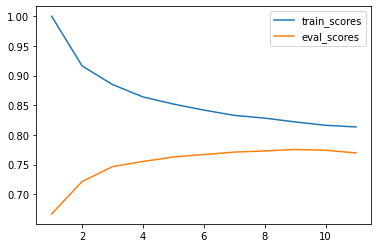

In [27]:
from sklearn.neighbors import KNeighborsRegressor

train_scores = []
test_scores = []
for k in range(1, 12):
    knn = KNeighborsRegressor(k)
    knn.fit(reduced_train_x, train_y_train)
    train_scores.append(knn.score(reduced_train_x, train_y_train))
    test_scores.append(knn.score(reduced_eval_x, train_y_eval))
    
scores = pd.DataFrame({'train_scores':train_scores, 'eval_scores':test_scores}, index=range(1,12))
print(scores)
scores.plot()

best_eval_score = max(test_scores)
k = test_scores.index(best_eval_score)+1
print('\nBest paramter K: {} with eval score of {:.2f} and train score of {:.2f}'.format(k, best_eval_score, train_scores[k-1]))
knn = KNeighborsRegressor(k).fit(reduced_train_x, train_y_train)
print('Test score : {:.2f}'.format(knn.score(reduced_test_x, test_y)))

#### Model2 - Linear Regression Model using Normal Equation

In [94]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(reduced_train_x, train_y_train)

train_score = lr.score(reduced_train_x, train_y_train)
eval_score = lr.score(reduced_eval_x, train_y_eval)
print('Train score: ',round(train_score,4))
print('Best eval score: ',round(eval_score,4))
print('Test score : {:.2f}'.format(lr.score(reduced_test_x, test_y)))
print('\nCoefficients: \n',lr.coef_)

Train score:  0.6861
Best eval score:  0.6876
Test score : 0.69

Coefficients: 
 [[ 73243.65403149 118307.26271535 -36574.4942129   24300.32499814
  -89908.08891881   6771.29414605 -33252.62966829 -20011.09770894
  -13309.5885711   47866.1922165    9183.66311441  11173.93585987]]


#### Model3 - Ridge Model

Best parameters alpha:  0.01
Train score with best parameters: 0.6861
Best score on validation set: 0.6876
Test set score with best parameters: 0.6881

       train_scores  eval_scores
0.01       0.686136     0.687567
0.10       0.686136     0.687567
1.00       0.686136     0.687565
10.00      0.686135     0.687540


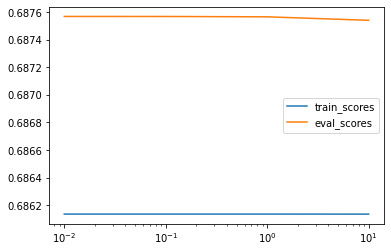

In [29]:
from sklearn.linear_model import Ridge

alphas = [0.01, 0.1, 1, 10]
train_scores = []
eval_scores = []
for a in alphas:
    lrrg = Ridge(a)
    lrrg.fit(reduced_train_x, train_y_train)
    train_scores.append(lrrg.score(reduced_train_x, train_y_train))
    eval_scores.append(lrrg.score(reduced_eval_x, train_y_eval))
    
best_eval_score = max(eval_scores)
best_parameters = alphas[eval_scores.index(best_eval_score)]
lrrg = Ridge(best_parameters)
lrrg.fit(reduced_train_x, train_y_train)
test_score = lrrg.score(reduced_test_x, test_y)
print("Best parameters alpha: ", best_parameters)
print("Train score with best parameters: {:.4f}".format(train_scores[eval_scores.index(best_eval_score)]))    
print("Best score on validation set: {:.4f}".format(best_eval_score))
print("Test set score with best parameters: {:.4f}\n".format(test_score))  
    
scores = pd.DataFrame({'train_scores':train_scores, 'eval_scores':eval_scores}, index=alphas)
print(scores)
scores.plot(logx=True)

#### Model4 - Lasso

In [ ]:
from sklearn.linear_model import Lasso

alpha_range = [0.01, 0.1, 1, 10, 100]
train_scores = []
eval_scores = []
for alpha in alpha_range: 
    lasso = Lasso(alpha)
    lasso.fit(reduced_train_x, train_y_train)
    train_scores.append(lasso.score(reduced_train_x, train_y_train))
    eval_scores.append(lasso.score(reduced_eval_x, train_y_eval))
    
best_score_la = max(eval_scores)
best_parameters_la = alpha_range[eval_scores.index(best_score_la)]
lasso = Lasso(best_parameters_la)
lasso.fit(reduced_train_x , train_y_train)
test_score_la = lasso.score(reduced_test_x, test_y)
print("Best parameters alpha : ", best_parameters_la)
print("Best score on validation set : {:.4f}".format(best_score_la))
print("Test set score with best parameters : {:.4f}\n".format(test_score_la))    
    
scores = pd.DataFrame({'train_scores':train_scores, 'eval_scores':eval_scores}, index=alpha_range)
print(scores)

#### Model5 - Polynomial

Best parameters:  2
Best score on validation set: 0.7978
Best score on test set:  0.83

   train_scores  eval_scores
1      0.686136     0.687568
2      0.790675     0.797819


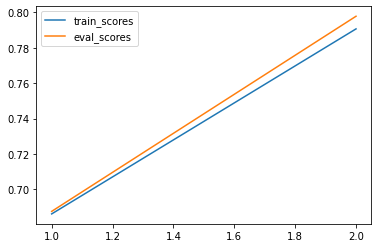

In [31]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train_scores=[]
eval_scores=[]

for n in range(1,3):
    poly = PolynomialFeatures(n)
    x_train_poly = poly.fit_transform(reduced_train_x)
    x_eval_poly = poly.transform(reduced_eval_x)
    x_test_poly = poly.transform(reduced_test_x)
    
    lr = LinearRegression().fit(x_train_poly, train_y_train)
    train_scores.append(lr.score(x_train_poly, train_y_train))
    eval_scores.append(lr.score(x_eval_poly, train_y_eval))
    
best_eval_score = max(eval_scores)
best_param = eval_scores.index(best_eval_score)+1
print("Best parameters: ", best_param)
print("Best score on validation set: {:.4f}".format(best_eval_score))
print('Best score on test set:  {:.2f}\n'.format(lr.score(x_test_poly, test_y)))

scores = pd.DataFrame({'train_scores':train_scores, 'eval_scores':eval_scores}, index=range(1,3))
print(scores)
scores.plot()

#### Model6 - Linear SVR

In [95]:
from sklearn.svm import LinearSVR

sc_y = StandardScaler()
train_y_scaled = sc_y.fit_transform(train_y_train)
eval_y_scaled = sc_y.transform(train_y_eval)
test_y_scaled = sc_y.transform(test_y)
lsvr_scores = 0

for c in [0.1, 1, 10, 100]:
    lsvr = LinearSVR(C=c)
    lsvr.fit(reduced_train_x, train_y_scaled.ravel())
    score = lsvr.score(reduced_eval_x, eval_y_scaled.ravel())
    if score > lsvr_scores:
            lsvr_score = score
            best_parameters = c
            
lsvr = LinearSVR(C=best_parameters).fit(reduced_train_x, train_y_scaled.ravel())
test_score = lsvr.score(reduced_test_x, test_y_scaled.ravel())
print("Best parameters: ", best_parameters)
print("Best score on validation set: {:.2f}".format(lsvr_score))
print("Test set score with best parameters: {:.2f}".format(test_score))

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best parameters:  100
Best score on validation set: 0.28
Test set score with best parameters: 0.54


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Model7 - SVR with linear kernel

In [37]:
from sklearn.svm import SVR
best_score = 0

for c in [1, 10, 100]:
    svrlk = SVR(kernel='linear', C=c)
    svrlk.fit(reduced_train_x, train_y_scaled.ravel())
    score = svrlk.score(reduced_eval_x, eval_y_scaled.ravel())
    if score > best_score:
            best_score = score
            best_parameters = c
            
svrlk = SVR(kernel = 'linear', C = best_parameters).fit(reduced_train_x, train_y_scaled.ravel())
test_score = svrlk.score(reduced_test_x, test_y_scaled.ravel())
print("Best parameters C : ", best_parameters)
print("Best score on validation set: {:.2f}".format(best_score))
print("Test score with best parameters: {:.2f}".format(test_score))

Best parameters C :  10
Best score on validation set: 0.64
Test score with best parameters: 0.63


#### Model8 - SVR with Kernel RBF

In [38]:
best_score = 0

for gamma in [0.01, 0.1, 1, 10, 100]:
    for C in [0.1, 1, 10, 100]:
        svr = SVR(kernel='rbf', gamma = gamma, C = C)
        svr.fit(reduced_train_x, train_y_scaled.ravel())
        score = svr.score(reduced_eval_x, eval_y_scaled.ravel())
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("Best parameters: ", best_parameters)

svr = SVR(kernel='rbf', **best_parameters).fit(reduced_train_x, train_y_scaled.ravel())
print('Best eval_score: {:.2f}'.format(svr.score(reduced_eval_x, eval_y_scaled.ravel())))
print('test_score: {:.2f}'.format(svr.score(reduced_test_x, test_y_scaled.ravel())))

Best parameters:  {'C': 100, 'gamma': 0.01}
Best eval_score: 0.82
test_score: 0.74


#### Model9 - SVR with Polynomial Kernel

       train_d2   eval_d2  train_d3   eval_d3
0.01   0.461252  0.525294  0.656011  0.653431
0.10   0.532632  0.593569  0.710525  0.500097
1.00   0.538829  0.588659  0.730131 -0.921960
10.00  0.538902  0.583538  0.734538 -1.281247


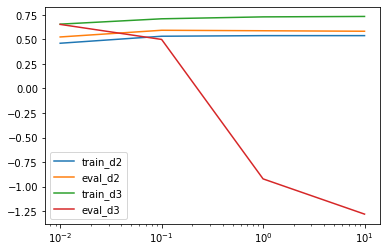

In [39]:
cs = [0.01, 0.1, 1, 10]
d2 = {'train':[], 'eval':[]}
d3 = {'train':[], 'eval':[]}

for c in cs:
    clf1 = SVR(kernel='poly', degree=2, C=c)
    clf2 = SVR(kernel='poly', degree=3, C=c)
        
    for clf, score in zip([clf1, clf2],
                         [d2, d3]):
        clf.fit(reduced_train_x, train_y_scaled.ravel())
        score['train'].append(clf.score(reduced_train_x, train_y_scaled.ravel()))
        score['eval'].append(clf.score(reduced_eval_x, eval_y_scaled.ravel()))

d2_scores = pd.DataFrame(d2, index=cs)
d3_scores = pd.DataFrame(d3, index=cs)
d2_scores.rename(columns={'train':'train_d2', 'eval':'eval_d2'}, inplace=True)
d3_scores.rename(columns={'train':'train_d3', 'eval':'eval_d3'}, inplace=True) 

scores = pd.concat([d2_scores, d3_scores], axis=1)
print(scores)
scores.plot(logx=True)

In [40]:
d = 2
(i, best_eval_score) = max((v, i) for i, v in enumerate(d2['eval']))
if max(d2['eval']) < max(d3['eval']):
    d = 3
    (best_eval_score, i) = max((v, i) for i, v in enumerate(d3['eval']))
    
c = cs[i]
print('Best params d = {:.2f}, C = {:.2f}'.format(d, c))
print('Best eval_score: {:.2f}'.format(best_eval_score))

svr = SVR(kernel='poly', degree=d, C=c)
svr.fit(reduced_train_x, train_y_scaled.ravel())
print('test_score: {:.2f}'.format(svr.score(reduced_test_x, test_y_scaled.ravel())))

Best params d = 3.00, C = 0.01
Best eval_score: 0.65
test_score: 0.64


#### Model10 - Decision Tree Regressor

    train_scores  eval_scores
1       0.233811     0.210235
2       0.442438     0.366470
3       0.545798     0.502851
4       0.622309     0.590390
5       0.693410     0.533676
6       0.749458     0.580632
7       0.797217     0.575956
8       0.841925     0.601692
9       0.879725     0.572015
10      0.909572     0.577968
11      0.932195     0.535125
Best parameter max_depth: 8
Best evaluation score: 0.60
Test score : 0.63


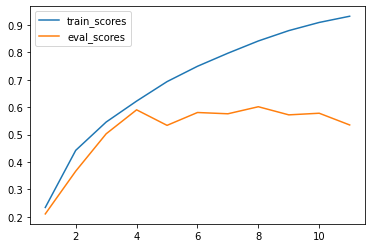

In [41]:
from sklearn.tree import DecisionTreeRegressor

max_depth = range(1, 12)
train_scores = []
eval_scores = []

for d in max_depth:
    dtree = DecisionTreeRegressor(max_depth=d)
    dtree.fit(reduced_train_x, train_y_train)
    train_scores.append(dtree.score(reduced_train_x, train_y_train))
    eval_scores.append(dtree.score(reduced_eval_x, train_y_eval))

scores = pd.DataFrame({'train_scores':train_scores, 'eval_scores':eval_scores}, index=range(1,12))
print(scores)
best_eval_score = max(eval_scores)
best_param = max_depth[eval_scores.index(best_eval_score)]
print('Best parameter max_depth: ' + str(best_param))
print('Best evaluation score: {:.2f}'.format(best_eval_score))
tree = DecisionTreeRegressor(max_depth=best_param).fit(reduced_train_x, train_y_train)
print('Test score : {:.2f}'.format(tree.score(reduced_test_x, test_y)))
scores.plot()

## Deep machine learning

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [72]:
train_x_scaled.shape

(11706, 18)

In [73]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=18, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss="mse", optimizer='adam', metrics=["accuracy"])
    return model

In [85]:
from sklearn.model_selection import GridSearchCV

np.random.seed(10)
model = KerasClassifier(build_fn=create_model, verbose=0)

params = {'batch_size':[10, 20, 30, 40], 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)

In [86]:
grid_search.fit(train_x_scaled, train_y)
grid_search.best_params_

{'batch_size': 10, 'epochs': 10}

In [76]:
batches = grid_search.best_params_['batch_size']
epochs = grid_search.best_params_['epochs']

In [89]:
model = grid_search.best_estimator_
model.fit(train_x_scaled, train_y, epochs=epochs, batch_size=batches, verbose=1)

Epoch 1/10
11706/11706 [==============================] - 3s 238us/step - loss: 1998832.5471 - accuracy: 8.5426e-05
Epoch 2/10
11706/11706 [==============================] - 3s 220us/step - loss: 1998654.5158 - accuracy: 8.5426e-05
Epoch 3/10
11706/11706 [==============================] - 2s 184us/step - loss: 1998653.8714 - accuracy: 8.5426e-05
Epoch 4/10
11706/11706 [==============================] - 2s 185us/step - loss: 1998653.7417 - accuracy: 8.5426e-05
Epoch 5/10
11706/11706 [==============================] - 2s 192us/step - loss: 1998653.7009 - accuracy: 8.5426e-05
Epoch 6/10
11706/11706 [==============================] - 2s 189us/step - loss: 1998653.6843 - accuracy: 8.5426e-05
Epoch 7/10
11706/11706 [==============================] - 2s 193us/step - loss: 1998653.6760 - accuracy: 8.5426e-05
Epoch 8/10
11706/11706 [==============================] - 2s 184us/step - loss: 1998653.6829 - accuracy: 8.5426e-05
Epoch 9/10
11706/11706 [==============================] - 2s 179us/step 

In [90]:
pred_test = model.predict(test_x_scaled)
pred_train = model.predict(train_x_scaled)

In [91]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Train R2 score: {:.2f}".format(r2_score(train_y, pred_train)))
print("Test R2 score: {:.2f}".format(r2_score(test_y, pred_test)))
print("Train mse : {:e}".format(mean_squared_error(train_y, pred_train)))
print("Test mse : {:e}".format(mean_squared_error(test_y, pred_test)))

Train R2 score: -1.64
Test R2 score: -1.26
Train mse : 3.361577e+11
Test mse : 3.923037e+11
